<a href="https://colab.research.google.com/github/Advita9/Wisonsin-Breast-Cancer-detection/blob/main/Wisconsin_breast_cancer_deep_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/breast_cancer_detection/Wisconsin_data.csv")

In [ ]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [ ]:
print(df.isnull().sum())


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<Axes: xlabel='diagnosis', ylabel='count'>

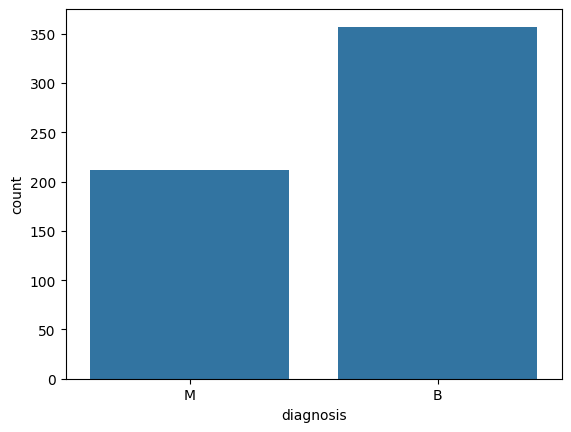

In [ ]:
sns.countplot(x="diagnosis", data=df) #M - malignant   B - benign

In [ ]:
print("Distribution of data: ", df['diagnosis'].value_counts())


Distribution of data:  diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
y = df["diagnosis"].values


In [ ]:
print("Labels before encoding are: ", np.unique(y))


Labels before encoding are:  ['B' 'M']


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Labels after encoding are:  [0 1]


In [ ]:
X = df.drop(labels = ["diagnosis", "id"], axis=1)


In [ ]:
print(X.describe().T)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.59846245 0.41886396        nan]
 [0.64314449 0.27257355 0.61578329 ... 0.23358959 0.22287813        nan]
 [0.60149557 0.3902604  0.59574321 ... 0.40370589 0.21343303        nan]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.12872068 0.1519087         nan]
 [0.64456434 0.66351031 0.66553797 ... 0.49714173 0.45231536        nan]
 [0.03686876 0.50152181 0.02853984 ... 0.25744136 0.10068215        nan]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (455, 30)
Shape of testing data is:  (114, 30)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 277ms/step - accuracy: 0.3780 - loss: 0.7754 - val_accuracy: 0.3772 - val_loss: 0.7458
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3462 - loss: 0.7635 - val_accuracy: 0.3772 - val_loss: 0.7183
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3797 - loss: 0.7347 - val_accuracy: 0.3772 - val_loss: 0.6989
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3525 - loss: 0.7200 - val_accuracy: 0.3772 - val_loss: 0.6846
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3975 - loss: 0.6994 - val_accuracy: 0.3772 - val_loss: 0.6716
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3924 - loss: 0.6936 - val_accuracy: 0.3772 - val_loss: 0.6601
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4606 - loss: 0.6736 - val_accuracy: 0.4035 - val_loss: 0.6502
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5037 - loss: 0.6490 - val_accuracy: 0.4825 - val_loss: 

In [ ]:
print(np.isnan(X_train).any(), np.isnan(y_train).any())


True False


In [ ]:
X = pd.DataFrame(X)
print(X.describe().T)

    count      mean       std  min       25%       50%       75%  max
0   569.0  0.338222  0.166787  0.0  0.223342  0.302381  0.416442  1.0
1   569.0  0.323965  0.145453  0.0  0.218465  0.308759  0.408860  1.0
2   569.0  0.332935  0.167915  0.0  0.216847  0.293345  0.416765  1.0
3   569.0  0.216920  0.149274  0.0  0.117413  0.172895  0.271135  1.0
4   569.0  0.394785  0.126967  0.0  0.304595  0.390358  0.475490  1.0
5   569.0  0.260601  0.161992  0.0  0.139685  0.224679  0.340531  1.0
6   569.0  0.208058  0.186785  0.0  0.069260  0.144189  0.306232  1.0
7   569.0  0.243137  0.192857  0.0  0.100944  0.166501  0.367793  1.0
8   569.0  0.379605  0.138456  0.0  0.282323  0.369697  0.453030  1.0
9   569.0  0.270379  0.148702  0.0  0.163016  0.243892  0.340354  1.0
10  569.0  0.106345  0.100421  0.0  0.043781  0.077023  0.133044  1.0
11  569.0  0.189324  0.121917  0.0  0.104690  0.165267  0.246155  1.0
12  569.0  0.099376  0.095267  0.0  0.040004  0.072092  0.122509  1.0
13  569.0  0.062636 

In [ ]:
X = X.dropna(axis=1)


In [ ]:
print(np.isnan(X).any())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool


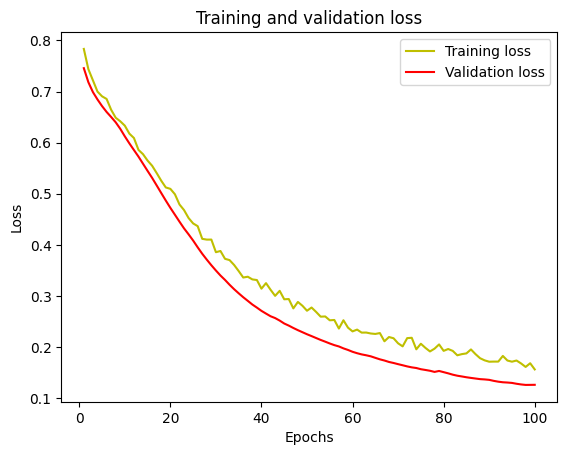

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

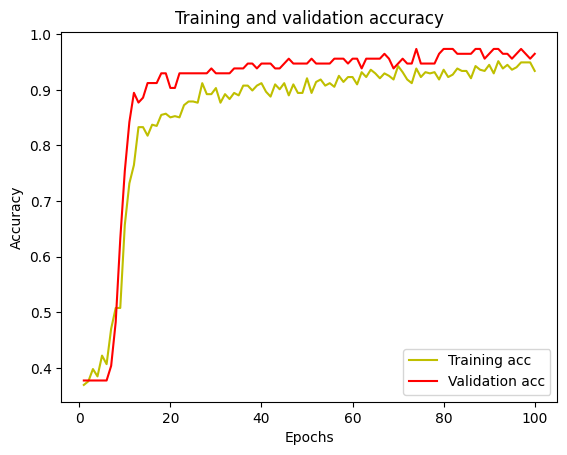

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


<Axes: >

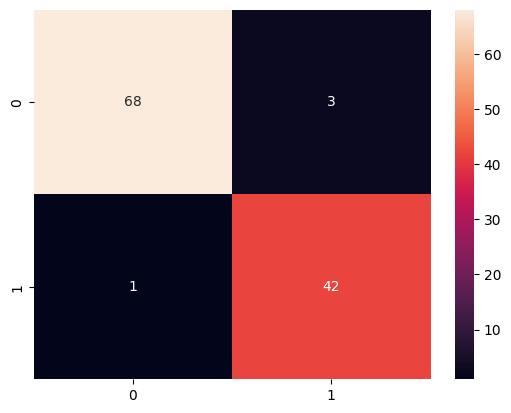

In [ ]:
y_pred_cnn = model.predict(X_test)
y_pred_cnn = (y_pred_cnn > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_cnn)

sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)


In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)



In [ ]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)



In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    return accuracy, precision, recall, f1


In [ ]:
y_pred_cnn = model.predict(X_test)
y_pred_cnn = (y_pred_cnn > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
evaluate_model(y_test, y_pred_cnn, "CNN")


CNN - Accuracy: 0.9649, Precision: 0.9333, Recall: 0.9767, F1 Score: 0.9545


(0.9649122807017544,
 0.9333333333333333,
 0.9767441860465116,
 0.9545454545454546)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

Logistic Regression - Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9535, F1 Score: 0.9762


(0.9824561403508771, 1.0, 0.9534883720930233, 0.9761904761904762)

In [ ]:
y_pred_knn = knn.predict(X_test)
evaluate_model(y_test, y_pred_knn, "KNN")


KNN - Accuracy: 0.9649, Precision: 0.9535, Recall: 0.9535, F1 Score: 0.9535


(0.9649122807017544,
 0.9534883720930233,
 0.9534883720930233,
 0.9534883720930233)

In [ ]:
y_pred_svm = svm.predict(X_test)
evaluate_model(y_test, y_pred_svm, "SVM")

SVM - Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9535, F1 Score: 0.9762


(0.9824561403508771, 1.0, 0.9534883720930233, 0.9761904761904762)

In [ ]:
y_pred_rf = rf.predict(X_test)
evaluate_model(y_test, y_pred_rf, "Random Forest")

Random Forest - Accuracy: 0.9649, Precision: 0.9756, Recall: 0.9302, F1 Score: 0.9524


(0.9649122807017544, 0.975609756097561, 0.9302325581395349, 0.9523809523809523)

In [ ]:
# Store results for each model
results = {}

# CNN
results["CNN"] = evaluate_model(y_test, y_pred_cnn, "CNN")

# Logistic Regression
results["Logistic Regression"] = evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# KNN
results["KNN"] = evaluate_model(y_test, y_pred_knn, "KNN")

# SVM
results["SVM"] = evaluate_model(y_test, y_pred_svm, "SVM")

# Random Forest
results["Random Forest"] = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Deeper CNN
results["Deeper CNN"] = evaluate_model(y_test, y_pred_deep_binary, "Deeper CNN")

# Wider CNN
results["Wider CNN"] = evaluate_model(y_test, y_pred_wide_binary, "Wider CNN")

# Display all results
print("\nComparison of Models:")
for model_name, metrics in results.items():
    print(f"{model_name}: Accuracy={metrics[0]:.4f}, Precision={metrics[1]:.4f}, Recall={metrics[2]:.4f}, F1 Score={metrics[3]:.4f}")


CNN - Accuracy: 0.9649, Precision: 0.9333, Recall: 0.9767, F1 Score: 0.9545
Logistic Regression - Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9535, F1 Score: 0.9762
KNN - Accuracy: 0.9649, Precision: 0.9535, Recall: 0.9535, F1 Score: 0.9535
SVM - Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9535, F1 Score: 0.9762
Random Forest - Accuracy: 0.9649, Precision: 0.9756, Recall: 0.9302, F1 Score: 0.9524
Deeper CNN - Accuracy: 0.9737, Precision: 0.9545, Recall: 0.9767, F1 Score: 0.9655
Wider CNN - Accuracy: 0.9649, Precision: 0.9535, Recall: 0.9535, F1 Score: 0.9535

Comparison of Models:
CNN: Accuracy=0.9649, Precision=0.9333, Recall=0.9767, F1 Score=0.9545
Logistic Regression: Accuracy=0.9825, Precision=1.0000, Recall=0.9535, F1 Score=0.9762
KNN: Accuracy=0.9649, Precision=0.9535, Recall=0.9535, F1 Score=0.9535
SVM: Accuracy=0.9825, Precision=1.0000, Recall=0.9535, F1 Score=0.9762
Random Forest: Accuracy=0.9649, Precision=0.9756, Recall=0.9302, F1 Score=0.9524
Deeper CNN: Accuracy=0.97

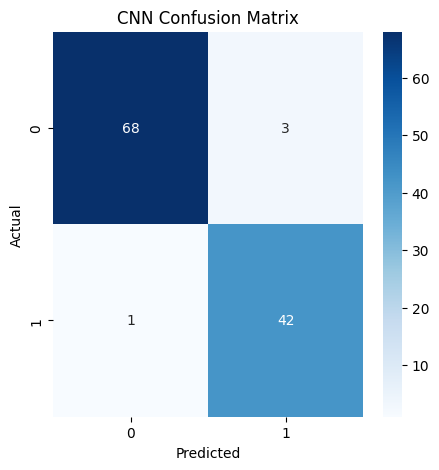

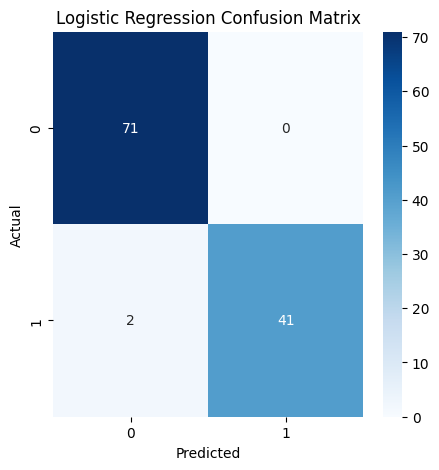

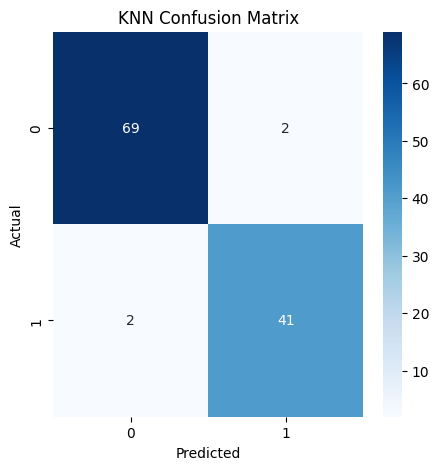

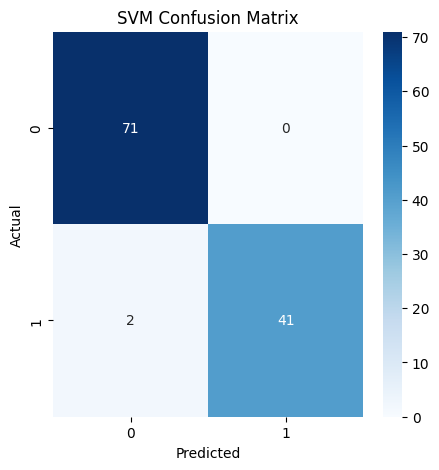

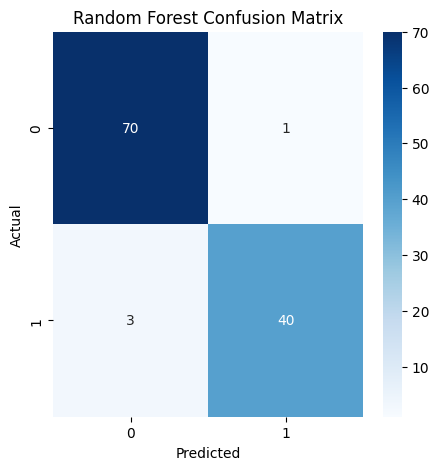

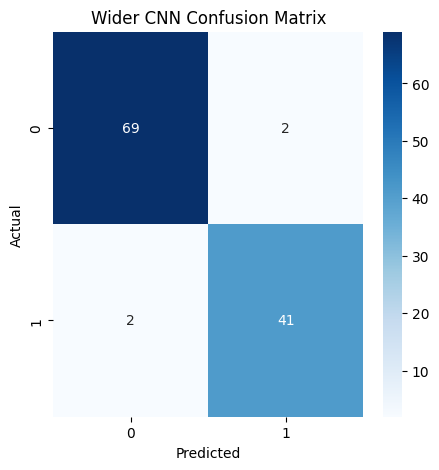

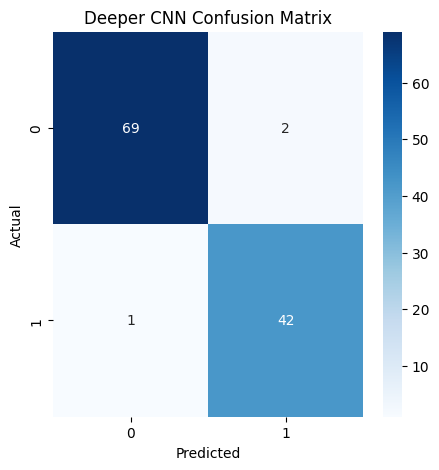

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "CNN": y_pred_cnn,
    "Logistic Regression": y_pred_log_reg,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf,
    "Wider CNN": y_pred_wide_binary,
    "Deeper CNN":  y_pred_deep_binary
}

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier



# Ensemble using VotingClassifier (Majority Voting)
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', log_reg),
        ('knn', knn),
        ('svm', svm),
        ('rf', rf)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for probability-based
)
voting_clf.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred_ensemble = voting_clf.predict(X_test)

# Evaluate the performance
accuracy_individual = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Random Forest': accuracy_score(y_test, y_pred_rf)
}
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

print("Individual Model Accuracies:", accuracy_individual)
print("Ensemble Model Accuracy:", accuracy_ensemble)


Individual Model Accuracies: {'Logistic Regression': 0.9824561403508771, 'K-Nearest Neighbors': 0.9649122807017544, 'SVM': 0.9824561403508771, 'Random Forest': 0.9649122807017544}
Ensemble Model Accuracy: 0.9824561403508771


In [ ]:
model_wide = Sequential()
model_wide.add(Dense(64, input_dim=30, activation='relu'))  # Wider layer
model_wide.add(Dropout(0.3))  # Slightly higher dropout to prevent overfitting
model_wide.add(Dense(32, activation='relu'))  # Additional layer
model_wide.add(Dropout(0.2))
model_wide.add(Dense(1))
model_wide.add(Activation('sigmoid'))

model_wide.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_wide.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model_deep = Sequential()
model_deep.add(Dense(32, input_dim=30, activation='relu'))  # More neurons in first layer
model_deep.add(Dropout(0.3))
model_deep.add(Dense(16, activation='relu'))  # Additional layer
model_deep.add(Dropout(0.3))
model_deep.add(Dense(8, activation='relu'))   # Another additional layer
model_deep.add(Dropout(0.2))
model_deep.add(Dense(1))
model_deep.add(Activation('sigmoid'))

model_deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_deep.summary())


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,665 (6.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model_wide.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
model_deep.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.6210 - loss: 0.6863 - val_accuracy: 0.8242 - val_loss: 0.6535
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7211 - loss: 0.6470 - val_accuracy: 0.8681 - val_loss: 0.6165
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8014 - loss: 0.6192 - val_accuracy: 0.8901 - val_loss: 0.5729
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8358 - loss: 0.5711 - val_accuracy: 0.9011 - val_loss: 0.5204
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8850 - loss: 0.5060 - val_accuracy: 0.8901 - val_loss: 0.4605
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8883 - loss: 0.4750 - val_accuracy: 0.9011 - val_loss: 0.4073
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8646 - loss: 0.4226 - val_accuracy: 0.9121 - val_loss: 0.3565
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9020 - loss: 0.3478 - val_accuracy: 0.9121 - val_los

In [ ]:
y_pred_wide = model_wide.predict(X_test)
y_pred_deep = model_deep.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [ ]:
import numpy as np

# Stack predictions horizontally to combine model outputs
all_predictions = np.hstack((y_pred_cnn, y_pred_wide_binary, y_pred_deep_binary))

# Majority vote across models
y_pred_cnn_ensemble = (np.sum(all_predictions, axis=1) >= 2).astype(int)  # Majority rule


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the hard ensemble
ensemble_accuracy = accuracy_score(y_test, y_pred_cnn_ensemble)
print("Hard CNN Ensemble Accuracy:", ensemble_accuracy)


Hard CNN Ensemble Accuracy: 0.9649122807017544


In [ ]:
y_pred_deep_binary = (y_pred_deep > 0.5).astype(int)
y_pred_wide_binary = (y_pred_wide > 0.5).astype(int)
